<a href="https://colab.research.google.com/github/anelglvz/Matematicas_Ciencia_Datos/blob/main/Optimizaci%C3%B3n/GradienteDescendiente_Regresi%C3%B3nLog%C3%ADstica/GradienteDescendiente_Regresi%C3%B3nLog%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Se verá como funciona el algoritmo de Gradiente Descendiente aplicado a una regresión logística que asignará probabilidades de ser HFT o no.

<img src='gd.jpeg' height='300'>

# Dependencias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(legacy='1.25')

# Carga de datos e interpretación


In [3]:
df = pd.read_csv('pruebas_datos.csv')

In [5]:
df

,OTR,OCR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,...,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,NbSecondWithAtLeatOneTrade,type
0,-0.264140,-0.171596,-0.034334,0.173848,-0.051861,-0.194635,-0.103174,-0.493894,0.669772,0.113391,...,0.446317,0.159271,-0.989267,-0.459192,0.414463,-0.068166,2.257305,0.215650,-0.430203,1
1,-0.267371,0.071957,-0.034334,-0.394632,-0.051861,-0.261262,-0.107967,-0.578826,-0.714095,0.478099,...,0.341803,0.053125,-0.989267,0.065955,2.493944,-0.174906,-0.259542,-0.257432,-0.415533,1
2,-0.268571,0.392193,-0.034334,-0.596358,-0.051861,-0.261262,-0.107967,-0.579091,-0.864277,0.449648,...,-0.843156,-0.601191,-0.989267,0.223500,1.925729,-0.174906,-0.350248,-0.257432,-0.351515,1
3,-0.267320,-0.082373,-0.034334,-0.337735,-0.051861,-0.260286,-0.107966,-0.574153,0.401915,-0.240214,...,0.205183,-0.085628,-0.989267,-0.406677,1.394323,-0.174906,-0.056171,-0.257431,-0.430203,1
4,-0.268375,0.094866,-0.034334,-0.551568,-0.051861,-0.261262,-0.107967,-0.579396,-0.876131,-0.003950,...,0.447088,0.160054,-0.989267,0.170985,1.041917,-0.174906,-0.327099,-0.257432,-0.384858,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50577,-0.270438,0.040609,-0.034334,-0.587633,-0.051861,-0.261262,-0.107967,-0.579589,-0.811629,-0.928057,...,-0.499086,-0.800893,-0.989267,-0.039074,2.972986,-0.174905,-0.139995,-0.257431,-0.431537,1
50578,-0.269299,0.040609,-0.034334,-0.704571,-0.051861,-0.261262,-0.107967,-0.573424,-0.873859,-1.356834,...,-0.927494,-1.235990,-0.989267,-0.616736,0.204493,-0.174905,-0.355996,-0.257262,-0.426202,1
50579,-0.270456,0.952123,-0.034334,-0.592510,-0.051861,-0.261262,-0.107967,-0.579500,-0.894274,0.012924,...,0.464365,0.177600,-0.989267,0.276014,1.680116,-0.174905,-0.076802,-0.256689,-0.414199,1
50580,-0.270274,2.659404,-0.034334,-0.648742,-0.051861,-0.261262,-0.107967,-0.579477,-0.886564,-0.241991,...,0.203363,-0.087476,-0.989267,0.748647,1.846925,-0.174905,-0.275480,-0.257133,-0.388859,1


In [6]:
# Los valores 1 son NON-HFT y los 0 son HFT
df.type.value_counts()

type
0    30522
1    20060
Name: count, dtype: int64

## Datos

Los datos son públicos, fueron utilizados en una competencia que pueden consultar [AQUÍ](https://challengedata.ens.fr/participants/challenges/50/). En esta competencia registraron muchas características de "traders", para tratar de clasificarlos en HFT (High Frequency Traders) o NON-HFT. Es de gran interés tratar de estudiar el impacto que tienen los HFT en los mercados, ya que lo que hacen es realizar intercambios dando ordenes de intercambio a un mecanismo llamado Limit Order Book (LOB), al cual le ordenan realizar compras o ventas a precios que ellos deseen.

#### Diccionario de datos



1. NbTradeVenueMic (23) : Número de centros de negociación en los que opera el jugador del mercado

De todos los centros de negociación, estadísticas sobre el número de operaciones observadas por segundo

2. MaxNbTradesBySecond (24)
3. MeanNbTradesBySecond (25)

Estadísticas sobre el delta de tiempo observado entre dos operaciones en la plataforma de negociación TV_1[1]:

4. min_dt_TV1 (26)
5. med_dt_TV1 (28)
6. mean_dt_TV1 (27)

Estadísticas sobre el delta de tiempo observado entre dos operaciones que se producen en la plataforma de negociación TV_1 y luego en la plataforma de negociación TV_2:

7. min_dt_TV1_TV2 (29)
8. med_dt_TV1_TV2 (31)
9. mean_dt_TV1_TV2 (30)

Estadísticas sobre el delta de tiempo observado entre dos operaciones que se producen en la plataforma de negociación TV_1 y luego en la plataforma de negociación TV_3:

10. min_dt_TV1_TV3 (32)
11. med_dt_TV1_TV3 (34)
12. mean_dt_TV1_TV3 (33)

Estadísticas sobre el delta de tiempo observado entre dos operaciones que se producen en la plataforma de negociación TV_1 y luego en la plataforma de negociación TV_4 :

13. min_dt_TV1_TV4 (35)
14. med_dt_TV1_TV4 (37)
15. mean_dt_TV1_TV4(36)

De todos los centros de negociación, número de segundos durante el día de negociación donde se observa al menos una operación del jugador del mercado i

16. NbSecondWithAtLeatOneTrade(38)

En la plataforma de negociación TV_1, tres proporciones entre el número de todo tipo de eventos[2] enviados a la LOB y:

17. el número de operaciones (OTR) (4)
18. el número de eventos de tipo cancelación (OCR) (5)
19. el número de eventos de tipo de modificación (OMR) (6)

En el centro de negociación TV_1, estadísticas durante el delta de tiempo observado entre dos eventos de todo tipo enviados:

20. min_time_two_events (7)
21. mean_time_two_events (8)
22. 10_p_time_two_events (9)
23. med_time_two_events (10)
24. 25_p_time_two_events (11)
25. 75_p_time_two_events (12)
26. 90_p_time_two_events (13)
27. max_time_two_events (14)

En la plataforma de negociación TV_1, estadísticas a lo largo de la vida útil observada de las órdenes canceladas:

28. min_lifetime_cancel (15)
29. mean_lifetime_cancel (16)
30. 10_p_lifetime_cancel (17)
31. med_lifetime_cancel (18)
32. 25_p_lifetime_cancel (19)
33. 75_p_lifetime_cancel (20)
34. 90_p_lifetime_cancel (21)
35. max_lifetime_cancel (22)

Extra variables

36. Type: HF, Non HFT (39)
37. Day
38. Share
39. Trader
40. Index

## Regresión lineal vs. regresión logística

**Regresión Lineal**
$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n + \epsilon
$$

**Regresión logística**
$$
\frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n)}}
$$
note la función sigmoide:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

<img src='lrlr.png'>

In [7]:
df.shape

(50582, 26)

In [8]:
X_prob = np.array(df.drop(['type'], axis=1))
X_prob

array([[-0.26413997, -0.17159563, -0.03433358, ...,  2.25730527,
         0.21564981, -0.43020348],
       [-0.26737141,  0.07195718, -0.03433358, ..., -0.25954205,
        -0.25743172, -0.41553282],
       [-0.26857105,  0.39219296, -0.03433358, ..., -0.35024783,
        -0.25743176, -0.35151541],
       ...,
       [-0.27045626,  0.9521233 , -0.03433358, ..., -0.07680184,
        -0.25668942, -0.41419912],
       [-0.27027382,  2.65940442, -0.03433358, ..., -0.27547952,
        -0.25713323, -0.3888589 ],
       [-0.2702773 ,  0.66275362, -0.03433358, ...,  0.28933079,
        -0.25311955, -0.423535  ]])

In [9]:
X_prob.shape

(50582, 25)

In [10]:
Y_prob = np.array(df['type'])
Y_prob

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
Y_prob.shape

(50582,)

In [12]:
num_inputs = 25
num_outputs = 2

W = np.random.normal(0, 0.1, (num_inputs, num_outputs)) # Jugaremos con este parametro
B = np.zeros(num_outputs) # Jugaremos con este parametro

In [13]:
print(W)
print(B)

[[-0.07336142 -0.12722393]
 [-0.10743015  0.02456634]
 [-0.14609871 -0.14251357]
 [ 0.03163193  0.03614482]
 [ 0.0271089  -0.04485533]
 [-0.14285336 -0.06584624]
 [ 0.07186906 -0.03349055]
 [-0.15584247  0.1442413 ]
 [-0.13595301 -0.14774107]
 [-0.00468219 -0.05855979]
 [-0.00274357  0.09736059]
 [-0.01326131  0.07778589]
 [-0.08207493 -0.05525214]
 [ 0.00597548  0.00106166]
 [-0.03354282 -0.12496763]
 [-0.08216455  0.01397401]
 [ 0.16357681  0.13631283]
 [-0.06976944 -0.12895353]
 [ 0.11034716  0.04019238]
 [-0.14529438  0.24809813]
 [ 0.29665235  0.11387773]
 [ 0.0127373  -0.02037582]
 [-0.10276661 -0.00441687]
 [ 0.03750897  0.19334031]
 [ 0.02290804 -0.02497653]]
[0. 0.]


# Definición de la función softmax
La función softmax generaliza a la función sigmoide.

Antes, notemos que dado un arreglo de numpy, nosotros podemos realizar sumas de diferentes formas utilizando el método "sum()".

Si no pasamos ningún parámetro a "sum()", lo que obtendremos será la suma de todas las entradas de nuestra matriz (o arreglo o tensor).

Si damos como parámetro el "0", lo que nos regresará será la suma por columnas (es decir, en el eje 0)

Si damos como parámetro el "1", nos regresará la suma por filas (es decir, en el eje 1)

In [14]:
X = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X

array([[1., 2., 3.],
       [4., 5., 6.]])

In [15]:
X.sum(keepdims=True), X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(array([[21.]]),
 array([[5., 7., 9.]]),
 array([[ 6.],
        [15.]]))

Con esto podemos implementar de modo muy sencillo la función softmax:

1. Obtener el exponenete de cada uno de nuestros elementos.
2. Tomamos la suma de los elementos de su fila y normalizamos

La expresión matemática de la función SoftMax es la siguiente:


$$ \mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}. $$

In [16]:
def softmax(X):
    X_exp = np.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

Veamos un ejemplo con la matriz de 2X3 creada anteriormente.

In [17]:
# 4 clases
W_p_X = np.random.normal(0, 0.1, (3, 4)) # Jugaremos con este parametro
B_p_X = np.zeros(4) # Jugaremos con este parametro

In [18]:
print(W_p_X, B_p_X)

[[-0.04610086 -0.06113379 -0.11800802 -0.00499342]
 [ 0.12225484  0.05710045 -0.01495935 -0.15047633]
 [-0.17940787 -0.02965812 -0.10919626  0.07339429]] [0. 0. 0. 0.]


In [19]:
X @ W_p_X + B_p_X

array([[-0.33981481, -0.03590725, -0.47551551, -0.0857632 ],
       [-0.6495765 , -0.13698163, -1.20200643, -0.33198956]])

In [20]:
softmax(X @ W_p_X + B_p_X)

array([[0.22136206, 0.29997741, 0.19327208, 0.28538845],
       [0.21649819, 0.36146928, 0.12460544, 0.29742709]])

Si observamos con cuidado, podemos ver que con esta operación estamos transformando todas nuestras entradas en números positivos. Mas aún, cada fila suma 1, es decir, la convertimos en una distribución de probabilidad.

In [21]:
x_prob = softmax(X @ W_p_X + B_p_X)
x_prob, x_prob.sum(1)

(array([[0.22136206, 0.29997741, 0.19327208, 0.28538845],
        [0.21649819, 0.36146928, 0.12460544, 0.29742709]]),
 array([1., 1.]))

# Definiendo el modelo

Aquí pueden ver que tipo de modelo vamos a implementar. En este caso es una regresión softmax.

In [22]:
def net(X,W,b):
    return softmax(np.dot(X.reshape((-1, W.shape[0])), W) + b)

# Definiendo la función de pérdida

Usaremos la función Cross-Entropy, una de las mas populares dado que es buena para problemas de clasficación.

La función es la siguiente:
$$ -\sum_{c=1}^My_{o,c}\log(p_{o,c}), $$

donde $M$ es la cantidad de clases que tenemos, $log$ la función de logaritmo natural, $y$ es $0$ o $1$ dependiendo de la etiqueta real de la clase $c$ y por último $p_{o,c}$ es la probabilidad predicha de que la observación $o$ pertenezca a la clase $c$.

Para calcular esto, en lugar de utilizar un ciclo "for", utilizaremos funciones de numpy.

In [23]:
def cross_entropy(y_hat, y):
    return np.sum(- np.log(y_hat[range(len(y_hat)), y])) / y.shape[0]

In [24]:
# El resultado final es lo que alimentará a la cross-entropy, es decir etiqueta
# de que pertenece a la clase 1 por la probabilidad de pertenecer a la clase 1
y = np.array([0, 2])
y_hat = np.array([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

array([0.1, 0.5])

In [25]:
cross_entropy(y_hat, y)

1.4978661367769954

# Precisión de la clasificación

En un problema de clasificación multi-clase, es decir, un problema en el que observemos varias caracteristicas de un elemento y decidamos a que clase pertenece dicho elemento.

Por ejemplo: Un algoritmo de clasificación de imagenes que intente saber si algo es un perro, un gato o un ratón. Si introdujeramos características y al final diera un vector $(0.2, 0.38, 0.42)$, el algoritmo lo clasificaría como un ratón (lo marcaría como perteneciente a la tercer clase)

Cuando las predicciones son consistentes con las etiquetas verdaderas, decimos que son correctas. La precisión de la clasificación son la cantidad de predicciones correctas entre todas las predicciones. Sin embargo, es muy difícil optimizar esto directamente (no es una función diferenciable), pero será muy importante para ver el rendimiento de nuestro modelo.

Lo que hacemos para ver la precisión es encontrar el valor mas grande en el vector de probabilidades, convertirlo en entero (porque muy probablemente sea un valor entr 0 y 1) y compararlo con las etiquetas verdaderas de nuestros datos.

In [26]:
# ARGMAX regresa la posicion del elemento con mayor valor
np.array([[0.2,0.38, 0.42]]).argmax(axis=1)

array([2])

In [27]:
def accuracy(y_hat, y):
    """Calcula la cantidad de predicciones correctas."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.astype(y.dtype) == y
    return float(cmp.astype(y.dtype).sum())/ len(y)

In [28]:
accuracy(y_hat, y)

0.5

## Veamos como sería el accuracy para nuestro modelo con pesos al azar

In [33]:
X_prob

array([[-0.26413997, -0.17159563, -0.03433358, ...,  2.25730527,
         0.21564981, -0.43020348],
       [-0.26737141,  0.07195718, -0.03433358, ..., -0.25954205,
        -0.25743172, -0.41553282],
       [-0.26857105,  0.39219296, -0.03433358, ..., -0.35024783,
        -0.25743176, -0.35151541],
       ...,
       [-0.27045626,  0.9521233 , -0.03433358, ..., -0.07680184,
        -0.25668942, -0.41419912],
       [-0.27027382,  2.65940442, -0.03433358, ..., -0.27547952,
        -0.25713323, -0.3888589 ],
       [-0.2702773 ,  0.66275362, -0.03433358, ...,  0.28933079,
        -0.25311955, -0.423535  ]])

In [34]:
accuracy(net(X_prob, W, B),Y_prob)

0.6804989917361908

In [35]:
W = np.random.normal(0, 0.1, (num_inputs, num_outputs)) # Jugaremos con este parametro
B = np.zeros(num_outputs) # Jugaremos con este parametro

In [36]:
# Las probabilidades que predecimos para cada fila de nuestros datos
net(X_prob, W, B)

array([[0.3216505 , 0.6783495 ],
       [0.52245611, 0.47754389],
       [0.56882164, 0.43117836],
       ...,
       [0.81838667, 0.18161333],
       [0.7374839 , 0.2625161 ],
       [0.42246019, 0.57753981]])

In [37]:
# La etiqueta verdadera de nuestros datos
Y_prob

array([1, 1, 1, ..., 1, 1, 1])

# Softmax Estable


In [38]:
# Función softmax (Repetida de arriba solo para ejemplificar)
def softmax(X):
    X_exp = np.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

In [39]:
# Softmax Estable
def stable_softmax(X):
    X_exp = np.exp(X - np.max(X, axis=1, keepdims=True))
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

In [40]:
def net_s(X,W,b):
    return stable_softmax(np.dot(X.reshape((-1, W.shape[0])), W) + b)

# Demostración de Softmax estable

In [41]:
prueba = np.array([[99999, 99995, 99993],[9, 5, 3]])

In [42]:
softmax(prueba)

/var/folders/_2/ssn9p4gn1zq96vptrk6db0940000gn/T/ipykernel_10494/406658106.py:3: RuntimeWarning: overflow encountered in exp
  X_exp = np.exp(X)
/var/folders/_2/ssn9p4gn1zq96vptrk6db0940000gn/T/ipykernel_10494/406658106.py:5: RuntimeWarning: invalid value encountered in divide
  return X_exp / partition


array([[       nan,        nan,        nan],
       [0.97962921, 0.01794253, 0.00242826]])

In [43]:
stable_softmax(prueba)

array([[0.97962921, 0.01794253, 0.00242826],
       [0.97962921, 0.01794253, 0.00242826]])

In [44]:
cross_entropy(y_hat, y)

1.4978661367769954

¿Cómo sería el gradiente de nuestra función de pérdida?

Sea
$$
z_i = b + \omega_1 x_1 + \ldots + \omega_k x_k
$$
para nuestros datos i-ésimos $\{ x_1, \ldots, x_k \} \in X$. Tenemos que
$$
\frac{\partial L}{\partial \omega} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial \omega}
$$
así
$$
\frac{dL}{dz_i} = \frac{d}{dz_i} \left[  - \sum_{k=1}^c y_k \log (a_k) \right]
$$
$$
= - \sum_{k=1}^c y_k \frac{d \left( \log (a_k) \right)}{dz_i}
$$
$$
= - \sum_{k=1}^c y_k \frac{d \left( \log (a_k) \right)}{da_k} \cdot \frac{da_k}{dz_i}
$$
$$
= - \sum_{k=1}^c \frac{y_k}{a_k} \cdot \frac{da_k}{dz_i}
$$
$$
= - \left[ \frac{y_i}{a_i} \cdot \frac{da_i}{dz_i} + \sum_{k=1, k \neq i}^c \frac{y_k}{a_k} \frac{da_k}{dz_i} \right]
$$
$$
= - \frac{y_i}{\cancel{a_i}} \cdot \cancel{a_i} (1 - a_i) - \sum_{k=1, k \neq i}^c \frac{y_k}{\cancel{a_k}} \cdot (\cancel{a_k} a_i)
$$
$$
= - y_i + y_i a_i + \sum_{k=1, k \neq i}^c y_k a_i
$$
$$
= a_i \left( y_i + \sum_{k=1, k \neq i}^c y_k \right) - y_i
$$
$$
= a_i + \sum_{k=1}^c y_k - y_i
$$
$$
= a_i \cdot 1 - y_i \quad \text{since} \quad \sum_{k=1}^c y_k = 1
$$
$$
= a_i - y_i
$$
además
$$
\frac{\partial z_i}{\partial \omega_i} = x_i
$$


In [45]:
def grad_softmax_cross_entropy_for_w(X, y_true, w, b):
    netaux = net_s(X,w,b)

    ones_true_class = np.zeros_like(netaux) # Matriz de ceros que tiene la forma de las probabilidades, si alimentamos todos los datos es 50000X2

    ones_true_class[np.arange(len(netaux)),y_true] = 1 # Genera 1 o cero si esta en la clasificacion correcta

    softmax_ = netaux # softmax aplicado a mis probabilidades

    aux1 = softmax_ - ones_true_class

    return X.T @ aux1/X.shape[0]

In [46]:
def grad_softmax_cross_entropy_for_b(X, y_true, w, b):
    netaux = net_s(X,w,b)

    ones_true_class = np.zeros_like(netaux) # Matriz de ceros que tiene la forma de las probabilidades (logits.shape), si alimento todos los datos es 50000X2

    ones_true_class[np.arange(len(netaux)),y_true] = 1 # Genera 1 o cero si esta en la clasificacion correcta

    softmax_ = netaux # softmax aplicado a mis probabilidades

    aux1 = softmax_ - ones_true_class

    return aux1.sum(axis=0, keepdims=True)/X.shape[0]

Ahora podemos implementar Gradient Descent

In [47]:
def gradient_descent(x, y, w, b, net, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []

	for _ in range(num_epochs):
		y_probs = net_s(x, w, b)

		gradient_w = grad_softmax_cross_entropy_for_w(x,y,w,b)
		gradient_b = grad_softmax_cross_entropy_for_b(x,y,w,b)

	 #Actualización de los parámetros
		w = w - (learning_rate)*gradient_w
		b = b - (learning_rate)*gradient_b

		J_all.append(cross_entropy(y_probs, y))

	return J_all, w, b

In [48]:
W = np.random.normal(0, 0.1, (num_inputs, num_outputs)) # Jugaremos con este parametro
B = np.zeros(num_outputs) # Jugaremos con este parametro

In [49]:
learning_rate = 0.01
num_epochs = 1000

In [50]:
J_all, W, B = gradient_descent(X_prob, Y_prob, W, B, net, learning_rate, num_epochs)
Y_hat = net(X_prob, W, B)
J = cross_entropy(Y_hat, Y_prob)
print("Cost: ", J)
print("Parameters: ", W)
print("Intercepto: ", B)

Cost:  0.24293480868260442
Parameters:  [[ 0.39335421 -0.2311388 ]
 [-0.26676697 -0.18437606]
 [-0.16585777  0.11725553]
 [-0.0473998   0.02122745]
 [-0.01948092  0.02795025]
 [-0.06272606 -0.06348384]
 [-0.06877592  0.0132776 ]
 [ 0.09601284 -0.14886862]
 [-0.10109867  0.05726233]
 [-0.43028107  0.33212183]
 [-0.10554724  0.19333717]
 [-0.20324482 -0.03107103]
 [-0.07571916  0.04709109]
 [ 0.11847566 -0.08794992]
 [ 0.04810644 -0.10035331]
 [ 0.14945677 -0.0709922 ]
 [-0.21865768  0.09133098]
 [ 0.08961255  0.10831036]
 [ 0.89764612 -0.84417545]
 [ 0.00774678  0.13376164]
 [-0.03378854 -0.12511797]
 [ 0.18723218 -0.14849103]
 [-0.00214404  0.11424328]
 [-0.17516282 -0.01428661]
 [ 0.12943736 -0.16693244]]
Intercepto:  [[ 0.42224222 -0.42224222]]


In [82]:
print(J_all)

[0.6955279993967503, 0.6833349602846674, 0.6719427675785542, 0.6612943986380477, 0.6513356145844893, 0.6420151439744824, 0.6332847905714779, 0.6250994732431392, 0.6174172075988159, 0.6101990397325399, 0.6034089424312721, 0.597013683603343, 0.590982675666742, 0.5852878133931403, 0.5799033063836597, 0.5748055110695864, 0.5699727659594067, 0.565385232833227, 0.561024745731632, 0.556874668895574, 0.5529197642733092, 0.5491460688005236, 0.5455407813595242, 0.5420921591121677, 0.538789422760329, 0.5356226702010399, 0.5325827979973952, 0.529661430070039, 0.526850853018807, 0.5241439575032462, 0.5215341851391769, 0.5190154804024179, 0.5165822470675426, 0.5142293087471149, 0.5119518731339076, 0.509745499584293, 0.5076060697146954, 0.5055297607144563, 0.5035130211075028, 0.5015525487218158, 0.49964527064994463, 0.4977883250057747, 0.49597904430260914, 0.4942149402955, 0.49249369014682026, 0.4908131237884912, 0.4891712123671838, 0.4875660576703821, 0.48599588244153824, 0.48445902150180437, 0.4829

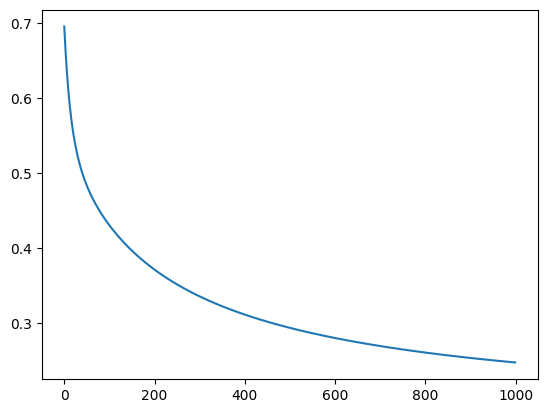

In [83]:
perdida_por_epoca = np.array(J_all).reshape(-1,1)
plt.plot(perdida_por_epoca)
plt.show()

In [84]:
# Las probabilidades que predecimos para cada fila de nuestros datos
net(X_prob, W, B)

array([[0.13510325, 0.86489675],
       [0.23094691, 0.76905309],
       [0.25790055, 0.74209945],
       ...,
       [0.1484388 , 0.8515612 ],
       [0.17090578, 0.82909422],
       [0.55233702, 0.44766298]])

In [85]:
# La etiqueta verdadera de nuestros datos
Y_prob

array([1, 1, 1, ..., 1, 1, 1])

In [86]:
accuracy(net(X_prob, W, B),Y_prob)

0.9147522834209798

# SGD: Stochastic Gradient Descent

En este caso, el algoritmo entrenara de modo un poco distinto, tomando muestras al azar de nuestros datos.

In [64]:
# Tamaño de la muestra o batch
batch_size = 200

In [65]:
number_of_rows = X_prob.shape[0]  # En nuestro caso, son 50,000
random_indices = np.random.choice(number_of_rows, size=batch_size, replace=False)
X_prima = X_prob[random_indices, :].copy()

In [66]:
X_prima

array([[-0.03101884, -0.04928051, -0.03433358, ..., -0.3039389 ,
        -0.20403147, -0.40886434],
       [-0.25725597,  0.06231153, -0.03433358, ...,  0.5433508 ,
        -0.0269187 , -0.423535  ],
       [-0.24325255, -0.25114449, -0.03433358, ..., -0.37266392,
        -0.25129256, -0.08477619],
       ...,
       [-0.0622378 , -0.26165589, -0.03433358, ..., -0.37533513,
        -0.25670875, -0.13545664],
       [-0.25384402,  0.55621296, -0.03433358, ..., -0.31734151,
        -0.2573344 , -0.35551649],
       [-0.21881656, -0.25415957, -0.03433358, ..., -0.05926799,
        -0.11827759, -0.40753064]])

In [67]:
Y_prima = Y_prob[random_indices].copy()

In [68]:
Y_prima

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0])

In [69]:
def batch_gradient_descent(x, y, w, b, net, batch_size, learning_rate=0.1, num_epochs=10):
  m = x.shape[0]
  J_all = []

  for _ in range(num_epochs):
    random_indices = np.random.choice(m, size=batch_size, replace=False)
    x_batch = x[random_indices, :].copy()
    y_batch = y[random_indices].copy()

    y_probs = net_s(x_batch, w, b)

    gradient_w = grad_softmax_cross_entropy_for_w(x_batch,y_batch,w,b)
    gradient_b = grad_softmax_cross_entropy_for_b(x_batch,y_batch,w,b)

    #Actualizamos los paramentros
    w = w - (learning_rate)*gradient_w
    b = b - (learning_rate)*gradient_b

    J_all.append(cross_entropy(y_probs, y_batch))

  return J_all, w, b

In [70]:
W = np.random.normal(0, 0.1, (num_inputs, num_outputs)) # Jugaremos con este parametro
B = np.zeros(num_outputs) # Jugaremos con este parametro

In [71]:
learning_rate = 0.01
num_epochs = 1000

In [72]:
J_all, W, B = batch_gradient_descent(X_prob, Y_prob, W, B, net, batch_size, learning_rate, num_epochs)
Y_hat = net(X_prob, W, B)
J = cross_entropy(Y_hat, Y_prob)
print("Cost: ", J)
print("Parameters: ", W)
print("Intercepto: ", B)

Cost:  0.25096102633805584
Parameters:  [[ 0.06474235 -0.33569061]
 [-0.02128136  0.08790205]
 [-0.1816528  -0.04137419]
 [-0.07023042  0.06287841]
 [-0.05430394  0.00770453]
 [-0.056722   -0.14577419]
 [-0.09780578  0.02579382]
 [ 0.07442624 -0.11638211]
 [ 0.04119595  0.16290797]
 [-0.4099604   0.35849248]
 [-0.21504532  0.16575198]
 [-0.0507377   0.03873348]
 [-0.0843507  -0.04593781]
 [-0.02571639 -0.21358222]
 [ 0.12696982  0.00949013]
 [-0.0350024  -0.11213438]
 [-0.0886639   0.00820174]
 [-0.18812977 -0.02580961]
 [ 0.82610066 -0.87882204]
 [ 0.05075958  0.10737947]
 [ 0.0303155  -0.02792889]
 [ 0.09666474 -0.04482789]
 [ 0.01132736  0.05264803]
 [-0.03367474 -0.0093878 ]
 [ 0.19693298 -0.11226002]]
Intercepto:  [[ 0.41137747 -0.41137747]]


In [73]:
print(J_all)

[0.9679128379223702, 0.9448829134941006, 0.9577621738669683, 0.9009108792516483, 0.8776674213396473, 0.8349726047436455, 0.8666832149961272, 0.7762349820497069, 0.7782859384940248, 0.8092382508620198, 0.7704283543159488, 0.7194836770776429, 0.7606536883382649, 0.723657664313518, 0.7798225427336747, 0.7006938779915606, 0.7353274829442814, 0.7097077204675383, 0.6545540070407747, 0.6877406910351738, 0.7175619143186538, 0.6806177625172853, 0.7144197505145329, 0.6639357946537604, 0.656126870486993, 0.6060999846903823, 0.7498210697412228, 0.6007433412495896, 0.6181068883927872, 0.6111607396000474, 0.5984985083307179, 0.6116187474764493, 0.5791660684079711, 0.5833755123817123, 0.6000938598298421, 0.6172054007767933, 0.5938033889125104, 0.6036275819830342, 0.5681701640004371, 0.5928725470028927, 0.5307654813094718, 0.570021660476624, 0.6171653147883889, 0.5689304386708148, 0.6153034279282669, 0.6109496134647793, 0.5720993498277567, 0.5774167720784671, 0.5370020238021889, 0.5658346775962839, 0.

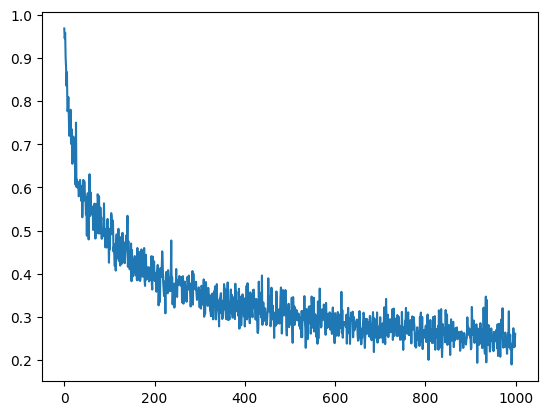

In [74]:
perdida_por_epoca = np.array(J_all).reshape(-1,1)
plt.plot(perdida_por_epoca)
plt.show()

In [75]:
# Las probabilidades que predecimos para cada fila de nuestros datos
net(X_prob, W, B)

array([[0.18745427, 0.81254573],
       [0.19879392, 0.80120608],
       [0.2421429 , 0.7578571 ],
       ...,
       [0.13801447, 0.86198553],
       [0.16448213, 0.83551787],
       [0.56012516, 0.43987484]])

In [76]:
# La etiqueta verdadera de nuestros datos
Y_prob

array([1, 1, 1, ..., 1, 1, 1])

In [77]:
accuracy(net(X_prob, W, B),Y_prob)

0.9147918231782057